In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter
import ast

In [0]:
def MakePieChart(data, symbol):
  getCount = Counter(k['symbol'] for k in data if dict(k).get('symbol'))
  symbolCount = dict(getCount)
  symbolCount[symbol] = 0
  symbolCount = {k: v for k, v in sorted(symbolCount.items(), key=lambda item: item[1], reverse=True)}
  print(symbolCount)
  fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

  cnt = 0
  data = []
  symbols = []
  for key in symbolCount.keys():
    data.append(symbolCount[key])
    symbols.append(key)
    cnt += 1
    if cnt >= 5:
      break

  def func(pct, allvals):
      absolute = int(pct/100.*np.sum(allvals))
      return "{:.1f}%\n({:d} g)".format(pct, absolute)


  wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                    textprops=dict(color="w"))

  ax.legend(wedges, symbols,
            title="Symbols",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

  plt.setp(autotexts, size=8, weight="bold")

  ax.set_title("Other Companies Mentioned in " + symbol + " Twits")

  plt.show()
    

def GetOtherCompanies(fname):
  df = pd.read_csv(fname)
  to_ignore = fname[:-10]
  stock_ds = []
  for row in df.newSymbols:
    lists = ast.literal_eval(row)
    for diction in lists:
      stock_ds.append(diction)
  MakePieChart(stock_ds, to_ignore)


  #for row in df.newSymbols:
  #  lists = ast.literal_eval(row)
  #  for diction in lists:
  #    stock_ds[diction] += 1
  #predominant_sign(column)

{'AAPL': 2077, 'MSFT': 2033, 'INTC': 1507, 'SPY': 1407, 'AMZN': 1196, 'FB': 1045, 'AMD': 1002, 'NVDA': 937, 'WMT': 857, 'MU': 845, 'IBM': 804, 'QQQ': 754, 'GE': 649, 'BAC': 611, 'BABA': 579, 'T': 574, 'ORCL': 537, 'AMAT': 534, 'BA': 523, 'TSLA': 519, 'GOOGL': 518, 'NFLX': 511, 'GOOG': 491, 'VZ': 448, 'NTAP': 445, 'JPM': 413, 'QCOM': 395, 'CRM': 388, 'TWTR': 387, 'PFE': 387, 'DIS': 386, 'ANET': 381, 'JD': 378, 'HD': 355, 'JNPR': 322, 'PANW': 314, 'CAT': 309, 'FEYE': 307, 'V': 301, 'CVX': 300, 'XOM': 292, 'KO': 292, 'TGT': 272, 'F': 271, 'AVGO': 253, 'NOK': 251, 'DJIA': 233, 'HPE': 233, 'AXP': 233, 'SNAP': 231, 'GS': 223, 'C': 222, 'MRK': 221, 'NTNX': 221, 'SPX': 217, 'ACIA': 214, 'WFC': 201, 'PG': 195, 'CMCSA': 194, 'SYMC': 191, 'SQ': 189, 'NKE': 188, 'NTES': 181, 'AAOI': 180, 'JNJ': 176, 'PYPL': 175, 'BB': 172, 'ADBE': 170, 'JCP': 170, 'OCLR': 170, 'BIDU': 167, 'LB': 167, 'DIA': 166, 'GM': 166, 'TEVA': 165, 'M': 163, 'ERIC': 158, 'TWLO': 157, 'SBUX': 156, 'MA': 155, 'XLK': 154, 'ATVI':

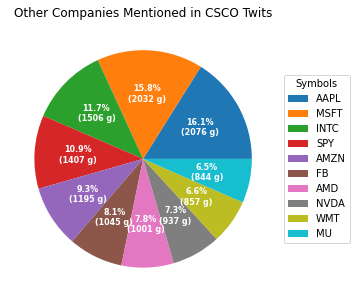

In [103]:
GetOtherCompanies('CSCO_twits.csv')

# New Section

NameError: ignored

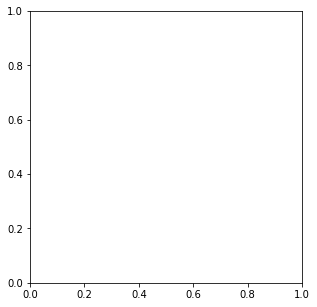

In [30]:
# example pie chart from https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

cnt = 0
data = []
ingredients = []
for key in stock_ds.keys():
  data.append(stock_ds[key])
  ingredients.append(key)
  cnt += 1
  if cnt >= 5:
    break

# data = [float(x.split()[0]) for x in recipe]
# ingredients = [x.split()[-1] for x in recipe]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

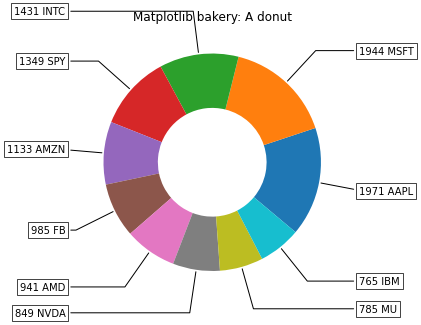

In [0]:
# example from https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

cnt = 0
data = []
recipe = []
ingredients = []
for key in stock_ds.keys():
  data.append(stock_ds[key])
  ingredients.append(key)
  recipe.append(str(stock_ds[key]) + ' ' + key)
  cnt += 1
  if cnt >= 10:
    break

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()